# CAR LOGO IMAGE CLASSIFICATION PROJECT

In [2]:

#importing important libraries for the project
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Flatten,Activation,Dense

In [3]:
#installing patool library for unzipping the dataset
pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.4 MB/s eta 0:00:00


In [4]:
#importing patoolib library
import patoolib


In [5]:
#defining the path of dataset and its files
path="/content/dataset"

In [6]:
# unzipping the dataset.zip file
patoolib.extract_archive("/content/dataset.zip")

patool: Extracting /content/dataset.zip ...
patool: running /usr/bin/7z x -o./Unpack_5575hmes -- /content/dataset.zip
patool: ... /content/dataset.zip extracted to `dataset'.


'dataset'

In [3]:

batch_size=32
img_height=224
img_width=224

In [6]:

# Data preprocessing using ImageDataGenerator which helps in Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,
                                   horizontal_flip = True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
#preparing training dataset

training_set = train_datagen.flow_from_directory('/content/dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3747 images belonging to 28 classes.


In [8]:
#preparing validation dataset

test_set = test_datagen.flow_from_directory('/content/dataset',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3747 images belonging to 28 classes.


In [9]:
 #importing important libraries
  from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3
  from tensorflow.keras.optimizers import Adam
  from sklearn.metrics import accuracy_score, precision_score, recall_score
  from tensorflow.keras.models import Model

In [73]:
#Hyperparameter tunning for chosing best CNN architecture

from sklearn.metrics import classification_report



# List of pre-trained models
pretrained_models = [ResNet50,VGG16, InceptionV3]

# Hyperparameters to tune
hyperparameters = {
    'batch_size': [32],
    'epochs': [50],
    'learning_rate': [0.001],
}

best_accuracy = 0.0
best_params = {}
best_model = None

for model_class in pretrained_models:
    for bs in hyperparameters['batch_size']:
        for epochs in hyperparameters['epochs']:
            for lr in hyperparameters['learning_rate']:
                # Load pre-trained model
                base_model = model_class(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

                # Add custom layers for fine-tuning
                x = base_model.output
                x = Flatten()(x)
                x = Dense(256, activation='relu')(x)
                predictions = Dense(28, activation='softmax')(x)

                model = Model(inputs=base_model.input, outputs=predictions)

                # Freeze initial layers
                for layer in base_model.layers:
                    layer.trainable = False

                model.compile(optimizer=Adam(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])

                # Train the model with data augmentation
                history = model.fit(training_set,
                                    epochs=epochs,
                                    validation_data=(test_set))

                # Evaluate on validation set
                val_accuracy = history.history['val_accuracy'][-1]

                print(f"Model: {model_class.__name__}, Batch Size: {bs}, Epochs: {epochs}, Learning Rate: {lr}, Validation Accuracy: {val_accuracy}")

                if val_accuracy > best_accuracy:
                    best_accuracy = val_accuracy
                    best_params = {'batch_size': bs, 'epochs': epochs, 'learning_rate': lr}
                    best_model = model_class

# Train the final best model
base_model = best_model(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# ... (rest of the code remains similar to the previous examples)


Epoch 1/50
118/118 [==============================] - 62s 492ms/step - loss: 4.9632 - accuracy: 0.0558 - val_loss: 3.1923 - val_accuracy: 0.0881
Epoch 2/50
118/118 [==============================] - 58s 492ms/step - loss: 3.2229 - accuracy: 0.0894 - val_loss: 3.0847 - val_accuracy: 0.1180
Epoch 3/50
118/118 [==============================] - 58s 488ms/step - loss: 3.0918 - accuracy: 0.1161 - val_loss: 2.9726 - val_accuracy: 0.1425
Epoch 4/50
118/118 [==============================] - 56s 478ms/step - loss: 3.0499 - accuracy: 0.1278 - val_loss: 2.9913 - val_accuracy: 0.1420
Epoch 5/50
118/118 [==============================] - 57s 488ms/step - loss: 2.9468 - accuracy: 0.1489 - val_loss: 2.8117 - val_accuracy: 0.2026
Epoch 6/50
118/118 [==============================] - 57s 485ms/step - loss: 2.8242 - accuracy: 0.1772 - val_loss: 2.6946 - val_accuracy: 0.2055
Epoch 7/50
118/118 [==============================] - 57s 478ms/step - loss: 2.7446 - accuracy: 0.1898 - val_loss: 2.6044 - val_ac

Epoch 1/50
118/118 [==============================] - 64s 528ms/step - loss: 1.7253 - accuracy: 0.5586 - val_loss: 0.8403 - val_accuracy: 0.7702
Epoch 2/50
118/118 [==============================] - 66s 562ms/step - loss: 0.7226 - accuracy: 0.7998 - val_loss: 0.5183 - val_accuracy: 0.8684
Epoch 3/50
118/118 [==============================] - 62s 522ms/step - loss: 0.5579 - accuracy: 0.8513 - val_loss: 0.4450 - val_accuracy: 0.8831
Epoch 4/50
118/118 [==============================] - 61s 520ms/step - loss: 0.4176 - accuracy: 0.8828 - val_loss: 0.3172 - val_accuracy: 0.9271
Epoch 5/50
118/118 [==============================] - 61s 517ms/step - loss: 0.3810 - accuracy: 0.8911 - val_loss: 0.2858 - val_accuracy: 0.9226
Epoch 6/50
118/118 [==============================] - 66s 557ms/step - loss: 0.3391 - accuracy: 0.9047 - val_loss: 0.2594 - val_accuracy: 0.9255
Epoch 7/50
118/118 [==============================] - 61s 521ms/step - loss: 0.3053 - accuracy: 0.9117 - val_loss: 0.3509 - val_ac

Epoch 1/50
118/118 [==============================] - 60s 463ms/step - loss: 4.9385 - accuracy: 0.5554 - val_loss: 0.6380 - val_accuracy: 0.8353
Epoch 2/50
118/118 [==============================] - 53s 451ms/step - loss: 0.6209 - accuracy: 0.8329 - val_loss: 0.3875 - val_accuracy: 0.8887
Epoch 3/50
118/118 [==============================] - 53s 451ms/step - loss: 0.4992 - accuracy: 0.8607 - val_loss: 0.3333 - val_accuracy: 0.9101
Epoch 4/50
118/118 [==============================] - 52s 443ms/step - loss: 0.4088 - accuracy: 0.8879 - val_loss: 0.2588 - val_accuracy: 0.9202
Epoch 5/50
118/118 [==============================] - 53s 446ms/step - loss: 0.4091 - accuracy: 0.8839 - val_loss: 0.2522 - val_accuracy: 0.9245
Epoch 6/50
118/118 [==============================] - 53s 446ms/step - loss: 0.2943 - accuracy: 0.9106 - val_loss: 0.2391 - val_accuracy: 0.9253
Epoch 7/50
118/118 [==============================] - 52s 440ms/step - loss: 0.2877 - accuracy: 0.9170 - val_loss: 0.1912 - val_ac

###Insights from the hyperparameter tuning:-
Best Model- InceptionV3 with epochs=50 and learning rate=0.001 and validation accuracy= 0.9858

In [68]:


""" Here we will be using imagenet weights with InceptionV3, here we have used include_top=False
 because we will train our own fully connected layer after the non trainable layers of the InceptionV3 architecture
"""
inceptionv3 = InceptionV3(input_shape=[224,224] + [3], weights='imagenet', include_top=False)

In [15]:
for layer in inceptionv3.layers:
  print(layer)

In [16]:
#checking layers which we are not training

for layer in inceptionv3.layers:
  layer.trainable=False


for layer in inceptionv3.layers:

  print(layer.name, layer.trainable)

input_1 False
conv2d False
batch_normalization False
activation False
conv2d_1 False
batch_normalization_1 False
activation_1 False
conv2d_2 False
batch_normalization_2 False
activation_2 False
max_pooling2d False
conv2d_3 False
batch_normalization_3 False
activation_3 False
conv2d_4 False
batch_normalization_4 False
activation_4 False
max_pooling2d_1 False
conv2d_8 False
batch_normalization_8 False
activation_8 False
conv2d_6 False
conv2d_9 False
batch_normalization_6 False
batch_normalization_9 False
activation_6 False
activation_9 False
average_pooling2d False
conv2d_5 False
conv2d_7 False
conv2d_10 False
conv2d_11 False
batch_normalization_5 False
batch_normalization_7 False
batch_normalization_10 False
batch_normalization_11 False
activation_5 False
activation_7 False
activation_10 False
activation_11 False
mixed0 False
conv2d_15 False
batch_normalization_15 False
activation_15 False
conv2d_13 False
conv2d_16 False
batch_normalization_13 False
batch_normalization_16 False
activati

In [17]:
#model architecture
model = Sequential()

model.add(inceptionv3)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(28,activation='softmax'))

In [18]:

# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dense_1 (Dense)             (None, 28)                7196      
                                                                 
Total params: 34,917,436
Trainable params: 13,114,652
Non-trainable params: 21,802,784
_________________________________________________________________


In [21]:
#adding loss, optimizer and metrics
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [23]:

# fit the model
# training only on 30 epochs because we have lack of resources(GPU) for computation
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/30
118/118 [==============================] - 52s 437ms/step - loss: 0.6191 - accuracy: 0.8351 - val_loss: 0.4125 - val_accuracy: 0.8820
Epoch 2/30
118/118 [==============================] - 54s 457ms/step - loss: 0.4323 - accuracy: 0.8826 - val_loss: 0.2358 - val_accuracy: 0.9290
Epoch 3/30
118/118 [==============================] - 52s 444ms/step - loss: 0.4646 - accuracy: 0.8764 - val_loss: 0.3528 - val_accuracy: 0.8978
Epoch 4/30
118/118 [==============================] - 52s 443ms/step - loss: 0.3908 - accuracy: 0.8991 - val_loss: 0.2349 - val_accuracy: 0.9333
Epoch 5/30
118/118 [==============================] - 53s 449ms/step - loss: 0.3790 - accuracy: 0.8986 - val_loss: 0.2364 - val_accuracy: 0.9274
Epoch 6/30
118/118 [==============================] - 54s 457ms/step - loss: 0.3123 - accuracy: 0.9207 - val_loss: 0.2646 - val_accuracy: 0.9239
Epoch 7/30
118/118 [==============================] - 52s 439ms/step - loss: 0.3495 - accuracy: 0.9061 - val_loss: 0.1336 - val_ac

In [29]:
#saving the model
from tensorflow.keras.models import load_model

model.save('model.h5')


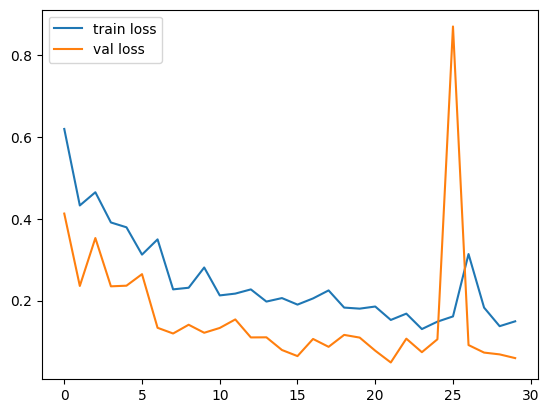

In [25]:
# loss plot for visualizing loss patterns while training the dataset
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

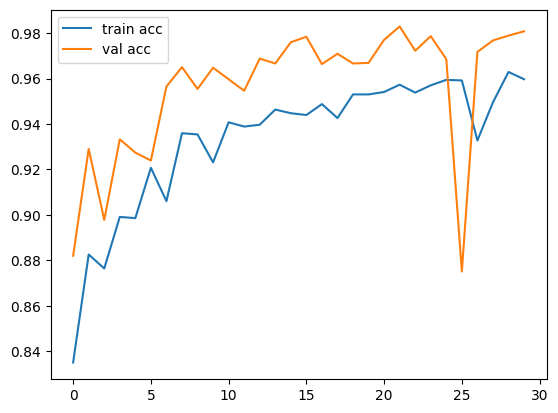

In [26]:
# accuracy plot for visualizing loss patterns while training the dataset
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [27]:
from tensorflow.keras.preprocessing import image


In [30]:
#loading the model
model=load_model('model.h5')


In [54]:
#loading test image
img1=image.load_img('/content/Maruti-Suzuki.jpg',target_size=(224,224))

In [55]:
#converting the image into array for predicting the output
x=image.img_to_array(img1)
x

array([[[166., 185., 199.],
        [166., 185., 199.],
        [166., 185., 199.],
        ...,
        [169., 188., 192.],
        [169., 188., 192.],
        [169., 188., 192.]],

       [[166., 185., 199.],
        [166., 185., 199.],
        [166., 185., 199.],
        ...,
        [169., 188., 192.],
        [169., 188., 192.],
        [169., 188., 192.]],

       [[166., 185., 199.],
        [166., 185., 199.],
        [166., 185., 199.],
        ...,
        [169., 188., 192.],
        [169., 188., 192.],
        [169., 188., 192.]],

       ...,

       [[107., 166., 200.],
        [107., 166., 200.],
        [107., 166., 200.],
        ...,
        [114., 173., 205.],
        [114., 173., 205.],
        [114., 173., 205.]],

       [[107., 166., 200.],
        [107., 166., 200.],
        [107., 166., 200.],
        ...,
        [114., 173., 205.],
        [114., 173., 205.],
        [114., 173., 205.]],

       [[107., 166., 200.],
        [107., 166., 200.],
        [107., 1

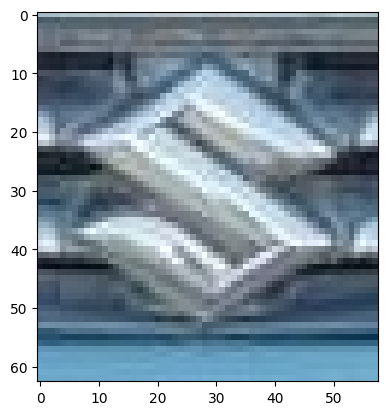

In [57]:
#visualizing the image- logo of maruti suzuki
Z = plt.imread('/content/Maruti-Suzuki.jpg')
plt.imshow(Z)

In [58]:
#normalizing the image_array
x=x/255

In [59]:
x

array([[[0.6509804 , 0.7254902 , 0.78039217],
        [0.6509804 , 0.7254902 , 0.78039217],
        [0.6509804 , 0.7254902 , 0.78039217],
        ...,
        [0.6627451 , 0.7372549 , 0.7529412 ],
        [0.6627451 , 0.7372549 , 0.7529412 ],
        [0.6627451 , 0.7372549 , 0.7529412 ]],

       [[0.6509804 , 0.7254902 , 0.78039217],
        [0.6509804 , 0.7254902 , 0.78039217],
        [0.6509804 , 0.7254902 , 0.78039217],
        ...,
        [0.6627451 , 0.7372549 , 0.7529412 ],
        [0.6627451 , 0.7372549 , 0.7529412 ],
        [0.6627451 , 0.7372549 , 0.7529412 ]],

       [[0.6509804 , 0.7254902 , 0.78039217],
        [0.6509804 , 0.7254902 , 0.78039217],
        [0.6509804 , 0.7254902 , 0.78039217],
        ...,
        [0.6627451 , 0.7372549 , 0.7529412 ],
        [0.6627451 , 0.7372549 , 0.7529412 ],
        [0.6627451 , 0.7372549 , 0.7529412 ]],

       ...,

       [[0.41960785, 0.6509804 , 0.78431374],
        [0.41960785, 0.6509804 , 0.78431374],
        [0.41960785, 0

In [60]:
from keras.applications.vgg16 import preprocess_input


In [61]:
#converting the image size into the required image size for predicting the output
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [62]:
#model prediction
model.predict(img_data)

1/1 [==============================] - 0s 34ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [63]:
#using argmax to find the class with the largest predicted probability using classes index
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 36ms/step


In [64]:
a


array([16])

In [65]:
#class names
name = ['Audi.common',
 'BMW.common',
 'Chevrolet.common',
 'Datsun.common',
 'Fiat.common',
 'Ford.common',
 'Honda.common',
 'Hyundai.common',
 'ISUZU.common',
 'Jaguar.frontal',
 'Jaguar.rear',
 'Jeep.common',
 'Kia.common',
 'Kia.new',
 'MG-Motor.common',
 'Mahindra.common',
 'Maruti-Suzuki.common',
 'Mercedes-Benz.common',
 'Mitsubishi.common',
 'Nissan.common',
 'Renault.common',
 'Skoda.common',
 'Tata.common',
 'Tata.text',
 'Toyota.common',
 'Volkswagen.common',
 'Volvo.frontal',
 'unknown']

In [66]:
#Output of the prediction
print("The predicted image is of",(name[a[0]]))

The predicted image is of Maruti-Suzuki.common
